In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# transform = transforms.Compose([transforms.ToTensor(),
#                                 transforms.Normalize((0.5), (0.5))])
# train = torchvision.datasets.MNIST('datasets/', train=True, transform=transform, target_transform=None, download=True)

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])
train = datasets.MNIST('datasets/', train=True, transform=transform, target_transform=None, download=False)
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [4]:
#Data loader is used to create batches 
loader = torch.utils.data.DataLoader(train, batch_size=100, shuffle=True)

In [5]:
class Deep_classifier(nn.Module):
    def __init__(self, in_size, h1_size, h2_size, out_size):
        super().__init__()
        self.linear1 = nn.Linear(in_size, h1_size)
        self.linear2 = nn.Linear(h1_size, h2_size)
        self.linear3 = nn.Linear(h2_size, out_size)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        y_pred = self.linear3(x)
        return y_pred

In [6]:
model = Deep_classifier(784, 125, 65, 10)
model

Deep_classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
epoch = 12
losses = []
loss_per_epoch = []
for i in range(epoch):
    epoch_loss = 0
    for image, label in loader:
        image = image.view(image.shape[0], -1)
        pred = model(image)

        loss = criterion(pred, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss)
        epoch_loss += loss
    loss_per_epoch.append(epoch_loss)

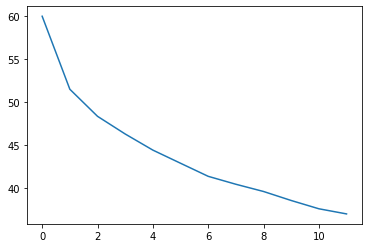

In [14]:
plt.plot(np.arange(epoch), loss_per_epoch)